# Analyse des comportements et préférences des clients

## Quels sont les comportements et préférences des clients selon les aspects de leurs achats ?

In [1]:
import pandas as pd, os, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from geobr import read_state

os.chdir(r"../donnees")

In [2]:
# Chargement des données
analyse_achats = pd.read_parquet("analyse_achat.parquet")

analyse_achats['purchase_timestamp'] = pd.to_datetime(analyse_achats['purchase_timestamp'])

analyse_achats = analyse_achats[
    (analyse_achats["purchase_timestamp"] >= "2017-01-01") & 
    (analyse_achats["purchase_timestamp"] <= "2018-08-31")
]

unique_customers = analyse_achats['customer_unique_id'].unique()
customers_names = {customer_id: f'Client {i+1}' for i, customer_id in enumerate(unique_customers)}
analyse_achats['customer_name'] = analyse_achats['customer_unique_id'].map(customers_names)

sns.set(style="whitegrid")

analyse_achats.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'shipping_limit', 'limit', 'name_lenght',
       'description_lenght', 'photos_qty', 'weight_g', 'length_cm',
       'height_cm', 'width_cm', 'category_name', 'customer_id',
       'purchase_timestamp', 'approved_at', 'delivered_carrier',
       'delivered_customer', 'estimated_delivery', 'status', 'annee', 'mois',
       'annee_mois', 'jour', 'annee_jour', 'jour_semaine', 'trimestre',
       'annee_trimestre', 'semaine', 'annee_semaine', 'heure', 'approuvee',
       'envoyee', 'livree', 'estimee', 'customer_unique_id', 'cust_zip_code',
       'cust_city', 'cust_state', 'cust_name_state', 'cust_lat', 'cust_lng',
       'sell_zip_code', 'sell_city', 'sell_state', 'sell_name_state',
       'sell_lat', 'sell_lng', 'customer_name'],
      dtype='object')

### Nombre de commandes par catégorie (Top 30)

C:\Users\lucas\AppData\Local\Temp\ipykernel_9148\675065160.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_orders', y='category_name', data=category_orders, palette='viridis')


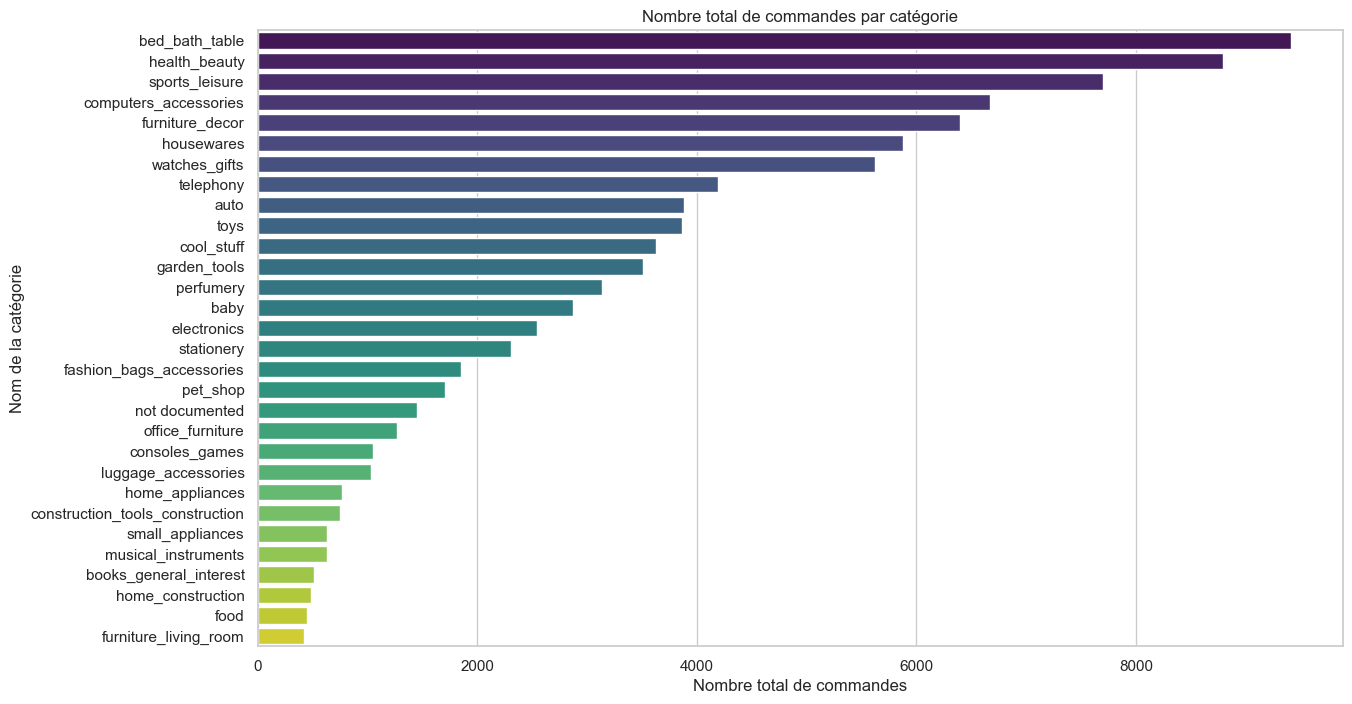

In [3]:
category_orders = analyse_achats.groupby('category_name').agg({'order_id': 'nunique'}).reset_index()
category_orders.columns = ['category_name', 'total_orders']
category_orders = category_orders.sort_values(by='total_orders', ascending=False).head(30)

plt.figure(figsize=(14, 8))
sns.barplot(x='total_orders', y='category_name', data=category_orders, palette='viridis')
plt.title('Nombre total de commandes par catégorie')
plt.xlabel('Nombre total de commandes')
plt.ylabel('Nom de la catégorie')
plt.show()

### Top 10 des clients par total dépensé

C:\Users\lucas\AppData\Local\Temp\ipykernel_9148\3493922463.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_spent', y='customer_name', data=top_customers, palette='viridis')


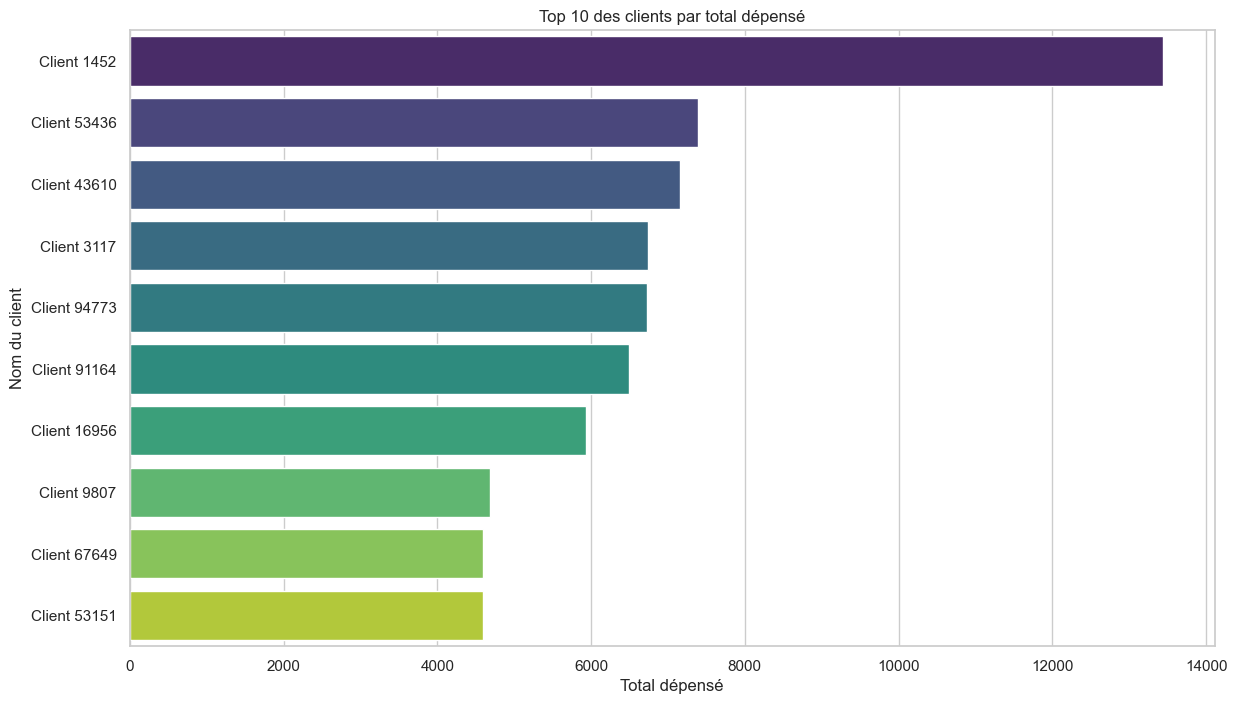

In [4]:
top_customers = analyse_achats.groupby('customer_name').agg({'price': 'sum'}).reset_index()
top_customers.columns = ['customer_name', 'total_spent']
top_customers = top_customers.sort_values(by='total_spent', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='total_spent', y='customer_name', data=top_customers, palette='viridis')
plt.title('Top 10 des clients par total dépensé')
plt.xlabel('Total dépensé')
plt.ylabel('Nom du client')
plt.show()

### Top 10 des clients par nombre de commandes

C:\Users\lucas\AppData\Local\Temp\ipykernel_9148\3084006814.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_orders', y='customer_name', data=top_customers_orders, palette='viridis')


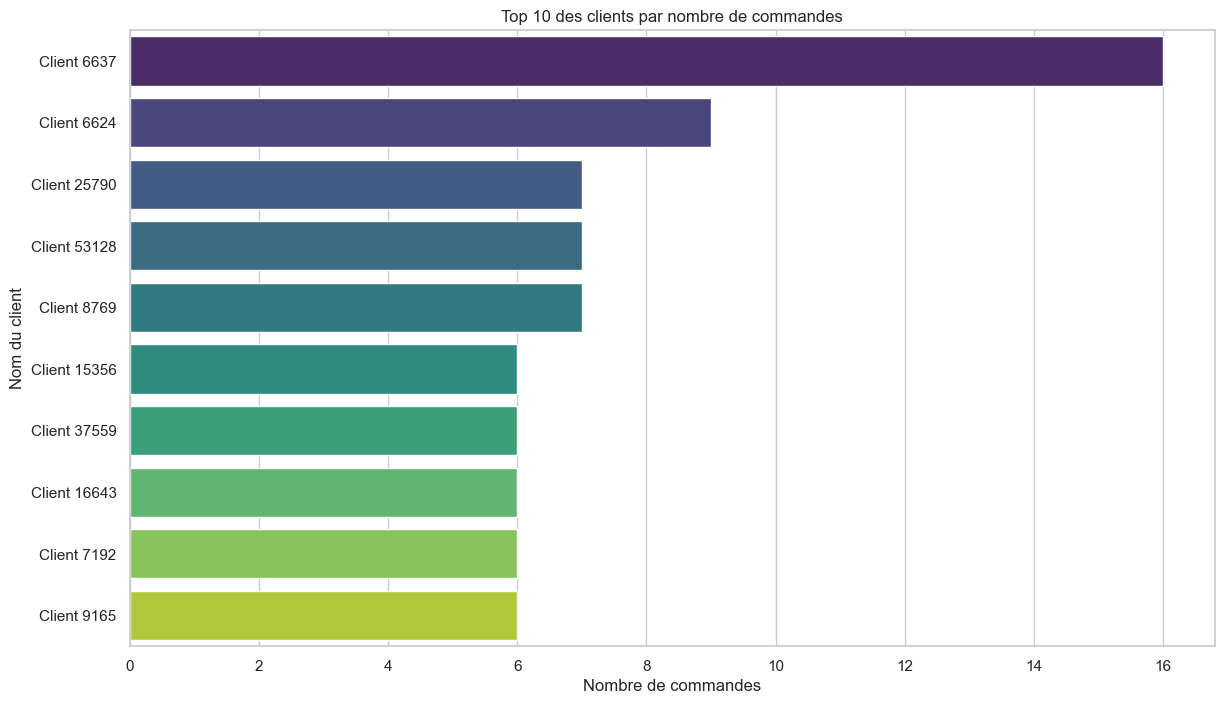

In [5]:
top_customers_orders = analyse_achats.groupby('customer_name').agg({'order_id': 'nunique'}).reset_index()
top_customers_orders.columns = ['customer_name', 'total_orders']
top_customers_orders = top_customers_orders.sort_values(by='total_orders', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='total_orders', y='customer_name', data=top_customers_orders, palette='viridis')
plt.title('Top 10 des clients par nombre de commandes')
plt.xlabel('Nombre de commandes')
plt.ylabel('Nom du client')
plt.show()

### Nombre total de clients par jour de la semaine

C:\Users\lucas\AppData\Local\Temp\ipykernel_9148\428034345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jour_semaine', y='total_clients', data=clients_per_day, palette='viridis')


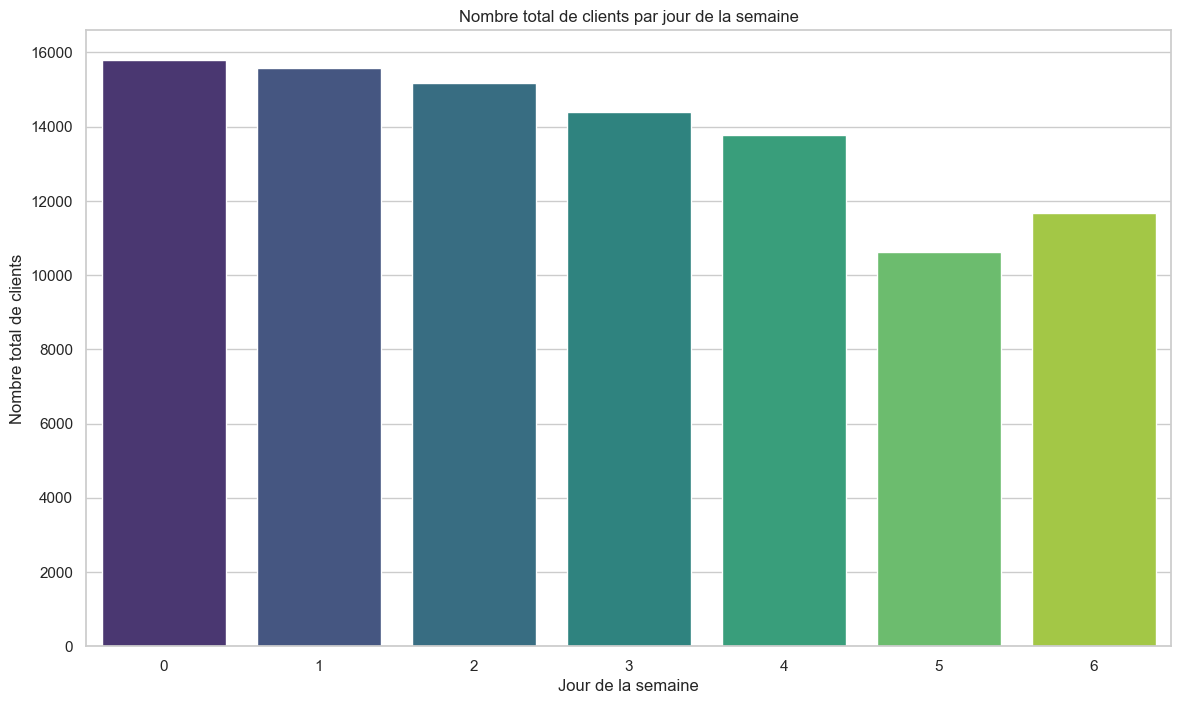

In [6]:
clients_per_day = analyse_achats.groupby('jour_semaine').agg({'customer_name': 'nunique'}).reset_index()
clients_per_day.columns = ['jour_semaine', 'total_clients']
clients_per_day = clients_per_day.sort_values(by='jour_semaine')

plt.figure(figsize=(14, 8))
sns.barplot(x='jour_semaine', y='total_clients', data=clients_per_day, palette='viridis')
plt.title('Nombre total de clients par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre total de clients')
plt.show()

### Nombre total de commandes par mois

C:\Users\lucas\AppData\Local\Temp\ipykernel_9148\898462323.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='mois', y='total_orders', data=orders_per_month, marker='o', palette='viridis')


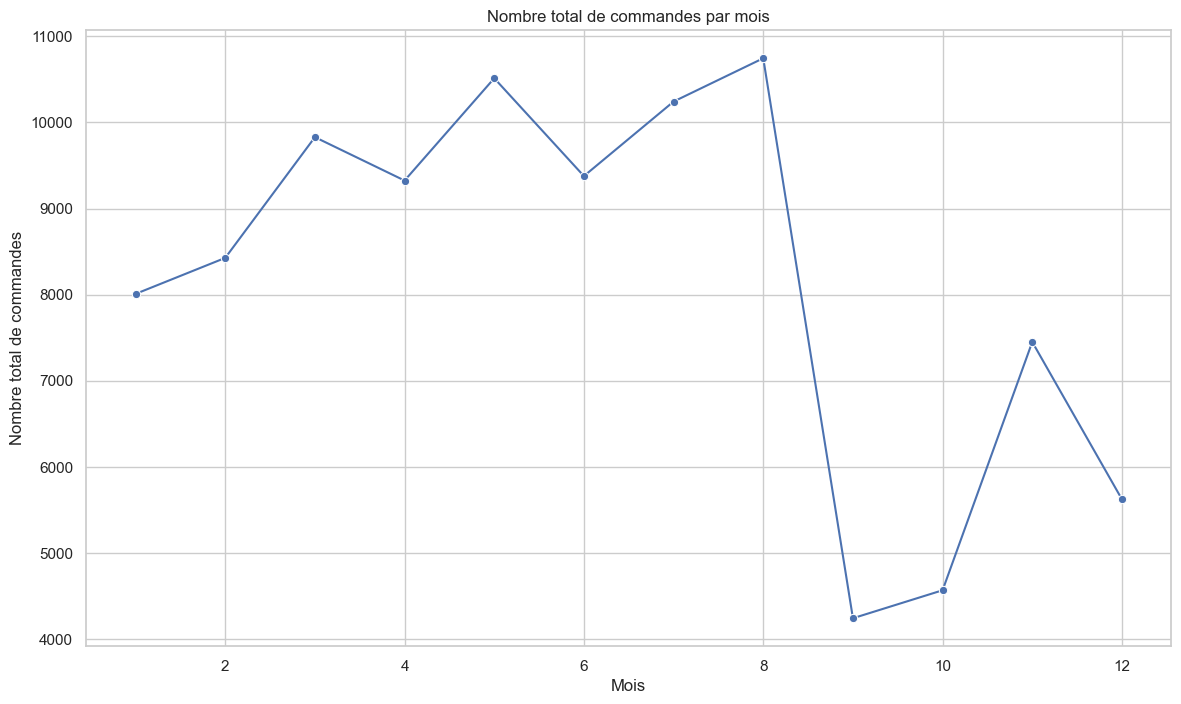

In [7]:
orders_per_month = analyse_achats.groupby('mois').agg({'order_id': 'nunique'}).reset_index()
orders_per_month.columns = ['mois', 'total_orders']
orders_per_month = orders_per_month.sort_values(by='mois')

plt.figure(figsize=(14, 8))
sns.lineplot(x='mois', y='total_orders', data=orders_per_month, marker='o', palette='viridis')
plt.title('Nombre total de commandes par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre total de commandes')
plt.show()

### Distribution des prix des produits achetés

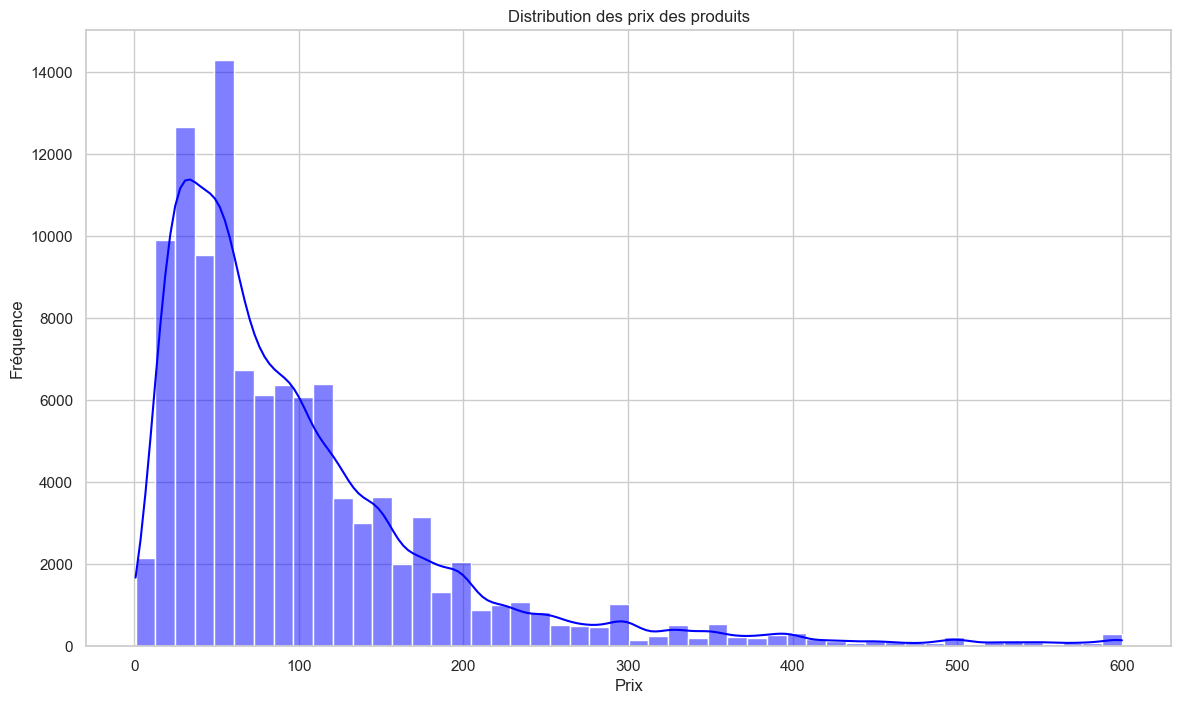

In [8]:
plt.figure(figsize=(14, 8))
sns.histplot(analyse_achats[analyse_achats['price'] <= 600]['price'], bins=50, kde=True, color='blue')
plt.title('Distribution des prix des produits')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

### Localisation des clients

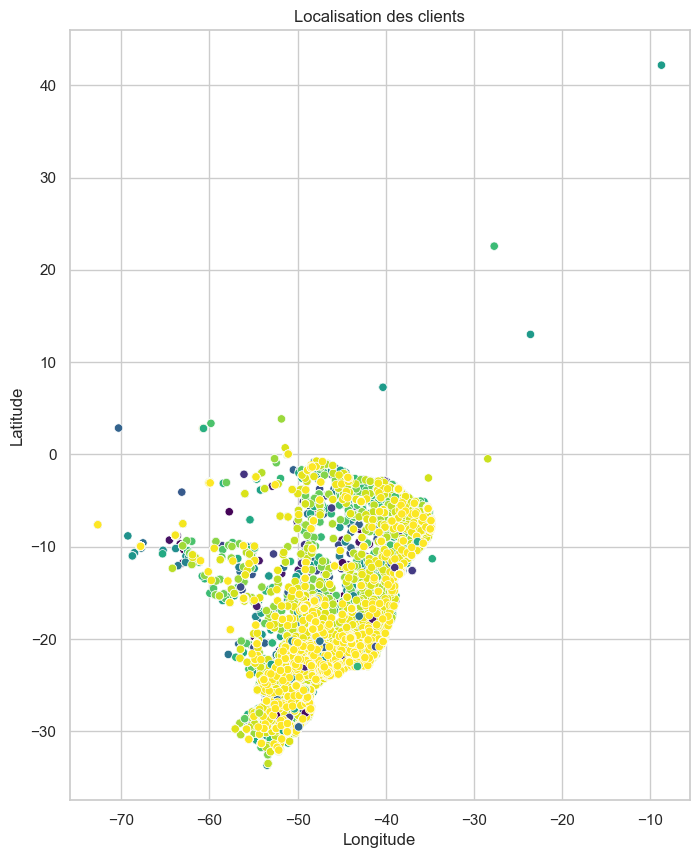

In [9]:
plt.figure(figsize=(8, 10))
sns.scatterplot(x='cust_lng', y='cust_lat', data=analyse_achats, hue='customer_name', palette='viridis', legend=False)
plt.title('Localisation des clients')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

###Top 30 des villes avec le plus de clients

C:\Users\lucas\AppData\Local\Temp\ipykernel_9148\2208363817.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_clients', y='cust_city', data=clients_by_city, palette='viridis')


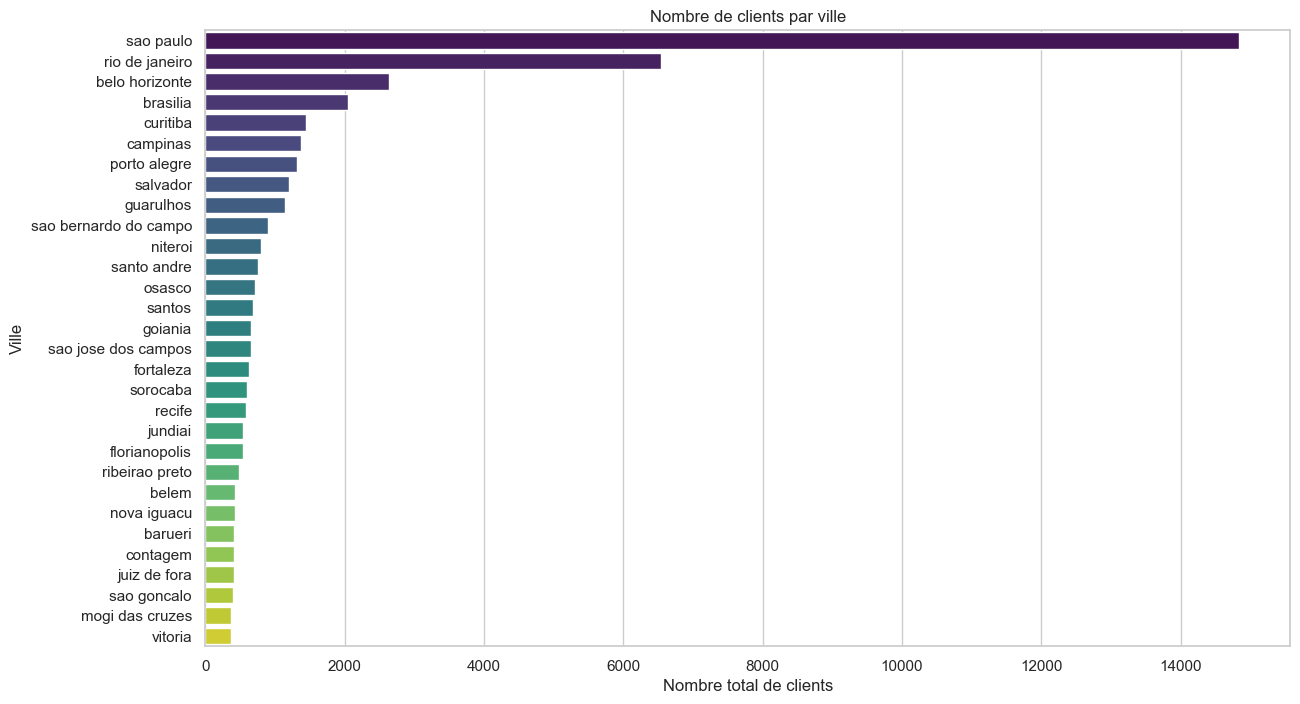

In [10]:
clients_by_city = analyse_achats[['customer_name', 'cust_city']].drop_duplicates().groupby('cust_city').size().reset_index(name='total_clients')
clients_by_city = clients_by_city.sort_values(by='total_clients', ascending=False).head(30)

plt.figure(figsize=(14, 8))
sns.barplot(x='total_clients', y='cust_city', data=clients_by_city, palette='viridis')
plt.title('Nombre de clients par ville')
plt.xlabel('Nombre total de clients')
plt.ylabel('Ville')
plt.show()

### Nombre de clients par état

C:\Users\lucas\AppData\Local\Temp\ipykernel_9148\2973846562.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_clients', y='cust_state', data=client_geo, palette='viridis')


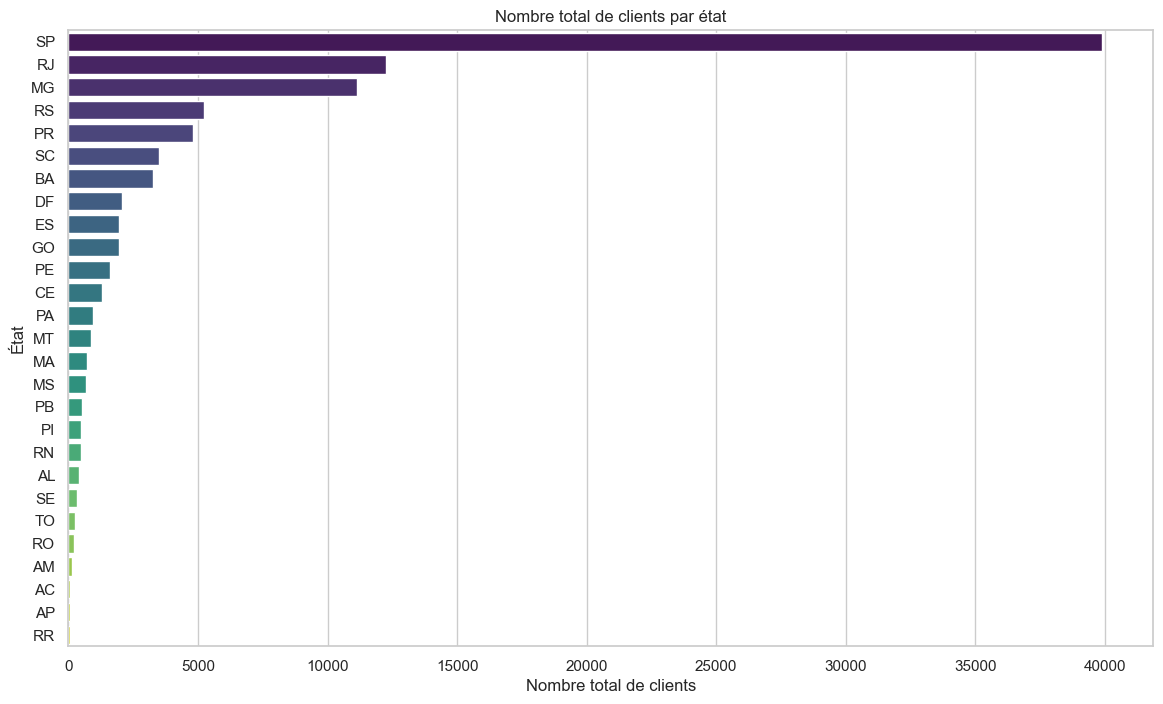

In [11]:
client_geo = analyse_achats[['customer_name', 'cust_state']].drop_duplicates()
client_geo = client_geo.groupby('cust_state').size().reset_index(name='total_clients')
client_geo = client_geo.sort_values(by='total_clients', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='total_clients', y='cust_state', data=client_geo, palette='viridis')
plt.title('Nombre total de clients par état')
plt.xlabel('Nombre total de clients')
plt.ylabel('État')
plt.show()

### Carte des états avec le plus de clients

<Figure size 1400x800 with 0 Axes>

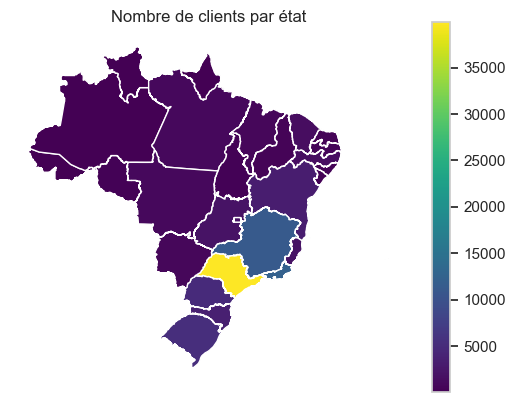

In [12]:
states = read_state(year=2018)
clients_by_state = analyse_achats[['customer_name', 'cust_state']].drop_duplicates().groupby('cust_state').size().reset_index(name='total_clients')

clients_by_state.columns = ['abbrev_state', 'total_clients']
states = states.merge(clients_by_state, on='abbrev_state')

plt.figure(figsize=(14, 8))
states.plot(column='total_clients', cmap='viridis', legend=True)
plt.title('Nombre de clients par état')
plt.axis('off')
plt.show()